# 🌳 Análise de Árvores Binárias: Níveis e Antecedentes

Vamos explorar visualmente a questão da nossa conversa anterior:

> **Pergunta:** Quantos antecedentes tem um nó no nível `n` em uma árvore binária (considerando a raiz como nível 0)?
> **Resposta:** Um nó no nível `n` tem exatamente `n` antecedentes.

Este notebook irá provar esta afirmação de duas formas:
1.  **Programaticamente:** Criando uma função `get_ancestors()` que conta os antecedentes.
2.  **Visualmente:** Desenhando a árvore e destacando o caminho de um nó até a raiz usando a biblioteca `graphviz`.

## 1. Configuração do Ambiente

Primeiro, precisamos da biblioteca `graphviz` para criar os diagramas. O comando a seguir a instalará.

In [1]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Definindo a Estrutura da Árvore

Vamos criar uma classe `Node` (Nó) simples. Para esta demonstração, é útil que cada nó "saiba" quem é seu pai (`parent`) e em qual nível (`level`) ele está, facilitando a verificação.

In [2]:
class Node:
    def __init__(self, key):
        self.key = key      # O valor/nome do nó (ex: 'A')
        self.left = None    # O filho da esquerda
        self.right = None   # O filho da direita
        self.parent = None  # O nó pai (para facilitar a subida)
        self.level = 0      # O nível do nó (raiz = 0)
        
    def __repr__(self):
        # Facilita a impressão
        return f"Node(key='{self.key}', level={self.level})"

## 3. Construindo uma Árvore de Exemplo

Vamos criar manualmente uma árvore para testar. Guardaremos uma referência especial para o `node_g`, que está no **nível 3**.

In [3]:
print("Construindo a árvore de exemplo...")

# Nível 0
root = Node('A')
root.level = 0

# Nível 1
root.left = Node('B')
root.left.level = 1
root.left.parent = root

root.right = Node('C')
root.right.level = 1
root.right.parent = root

# Nível 2
root.left.left = Node('D')
root.left.left.level = 2
root.left.left.parent = root.left

root.left.right = Node('E')
root.left.right.level = 2
root.left.right.parent = root.left

root.right.right = Node('F')
root.right.right.level = 2
root.right.right.parent = root.right

# Nível 3 (Nosso nó alvo)
root.left.left.left = Node('G')
root.left.left.left.level = 3
root.left.left.left.parent = root.left.left

# Salva a referência para o nó 'G'
node_g = root.left.left.left

print(f"Árvore criada. Nó alvo: {node_g}")

Construindo a árvore de exemplo...
Árvore criada. Nó alvo: Node(key='G', level=3)


## 4. Prova Programática: Contando os Antecedentes

Agora, vamos criar uma função que recebe um nó e sobe pela árvore (`while node.parent is not None`) contando quantos "passos" ela dá até a raiz. O número de passos será o número de antecedentes.

In [4]:
def get_ancestors(node):
    """Sobe na árvore a partir do nó e retorna uma lista de seus antecedentes."""
    ancestors = []
    current = node
    
    # Continua subindo enquanto houver um pai
    while current.parent is not None:
        ancestors.append(current.parent.key)
        current = current.parent
        
    return ancestors

# --- Teste da Prova ---
target_node = node_g  # Nosso nó 'G' do Nível 3

ancestors_list = get_ancestors(target_node)

print(f"Nó Alvo: {target_node.key}")
print(f"Nível do Nó (n): {target_node.level}")
print(f"Lista de Antecedentes: {ancestors_list}")
print(f"Número de Antecedentes: {len(ancestors_list)}")

print("\n--- VERIFICAÇÃO ---")
if target_node.level == len(ancestors_list):
    print(f"PROVADO: O Nível do nó ({target_node.level}) é igual ao número de antecedentes ({len(ancestors_list)}).")
else:
    print("FALHA: A lógica está incorreta.")

Nó Alvo: G
Nível do Nó (n): 3
Lista de Antecedentes: ['D', 'B', 'A']
Número de Antecedentes: 3

--- VERIFICAÇÃO ---
PROVADO: O Nível do nó (3) é igual ao número de antecedentes (3).


## 5. Prova Visual: Desenhando o Diagrama

Finalmente, vamos usar o `graphviz` para desenhar a árvore. Esta é a parte mais clara da demonstração.

Vamos colorir:
* **Nó Alvo (`G`):** Vermelho
* **Antecedentes (`D`, `B`, `A`):** Azul

Diagrama da Árvore (Nó alvo=Vermelho, Antecedentes=Azul):


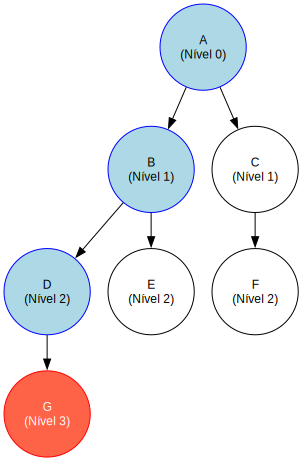

In [5]:
from graphviz import Digraph

def draw_tree(root_node, target_node, ancestor_keys):
    """Cria um diagrama da árvore com nós destacados."""
    
    dot = Digraph(comment='Prova de Antecedentes')
    dot.attr('node', shape='circle', fontname='Arial', fontsize='12')
    
    # Usa uma fila para percorrer a árvore (BFS) e adicionar nós/arestas
    queue = [root_node]
    
    while queue:
        node = queue.pop(0)
        
        # Define o estilo do nó com base na sua função
        if node.key == target_node.key:
            # Nó alvo
            dot.node(node.key, label=f"{node.key}\n(Nível {node.level})", color='red', style='filled', fillcolor='tomato', fontcolor='white')
        elif node.key in ancestor_keys:
            # Antecedente
            dot.node(node.key, label=f"{node.key}\n(Nível {node.level})", color='blue', style='filled', fillcolor='lightblue')
        else:
            # Nó comum
            dot.node(node.key, label=f"{node.key}\n(Nível {node.level})")
        
        # Adiciona as arestas (links) para os filhos
        if node.left:
            dot.edge(node.key, node.left.key)
            queue.append(node.left)
            
        if node.right:
            dot.edge(node.key, node.right.key)
            queue.append(node.right)
            
    return dot

# --- Renderiza o Diagrama ---

# Pega a lista de antecedentes que já calculamos
ancestor_keys_list = ancestors_list 

diagrama = draw_tree(root, target_node, ancestor_keys_list)

print("Diagrama da Árvore (Nó alvo=Vermelho, Antecedentes=Azul):")

# Em um notebook Jupyter, 'diagrama' será renderizado automaticamente
diagrama

## Conclusão

Como o diagrama e o código demonstram, o nó 'G' está no **nível 3**.

Seus antecedentes são os nós no caminho de volta à raiz:
1.  **'D'** (Nível 2)
2.  **'B'** (Nível 1)
3.  **'A'** (Nível 0)

Isso totaliza **3 antecedentes**, provando visualmente que o número de antecedentes de um nó no nível `n` é exatamente `n`.